In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load
train_df = pd.read_csv("train.csv")

# Columns
cat_cols = ["neighbourhood_group", "room_type"]
num_cols = ["minimum_nights", "amenity_score", "number_of_reviews", "availability_365"]
target = "price_class"

# Quick stats BEFORE cleaning
print("Shape:", train_df.shape)
print("\nMissing values:\n", train_df.isnull().sum())
print("\nClass counts:\n", train_df[target].value_counts().sort_index())

# Impute
for c in cat_cols:
    train_df[c] = train_df[c].fillna(train_df[c].mode()[0])
for c in num_cols:
    train_df[c] = train_df[c].fillna(train_df[c].median())

# Encode
df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include=["bool"]).columns
df[bool_cols] = df[bool_cols].astype(int)

# Split
X = df.drop(target, axis=1)
y = df[target].astype(int)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale (fit on train only)
scaler = StandardScaler()
X_tr[num_cols] = scaler.fit_transform(X_tr[num_cols])
X_va[num_cols] = scaler.transform(X_va[num_cols])

# Final checks
print("\nEncoded shape:", df.shape, "| #features:", X.shape[1])
print("Train/Val:", X_tr.shape, X_va.shape)
print("NaNs in X_tr/X_va:", X_tr.isnull().sum().sum(), X_va.isnull().sum().sum())
print("Scaled means (train numeric):", np.round(X_tr[num_cols].mean().values, 3))
print("Scaled stds  (train numeric):", np.round(X_tr[num_cols].std(ddof=0).values, 3))


Shape: (41348, 7)

Missing values:
 neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64

Class counts:
 price_class
0     5567
1    23287
2     9844
3     2650
Name: count, dtype: int64

Encoded shape: (41348, 11) | #features: 10
Train/Val: (33078, 10) (8270, 10)
NaNs in X_tr/X_va: 0 0
Scaled means (train numeric): [-0.  0.  0. -0.]
Scaled stds  (train numeric): [1. 1. 1. 1.]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [3]:
train_df = pd.read_csv("train.csv")

print("Shape:", train_df.shape)
train_df.head()


Shape: (41348, 7)


,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  object 
 1   room_type            40737 non-null  object 
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB


neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64


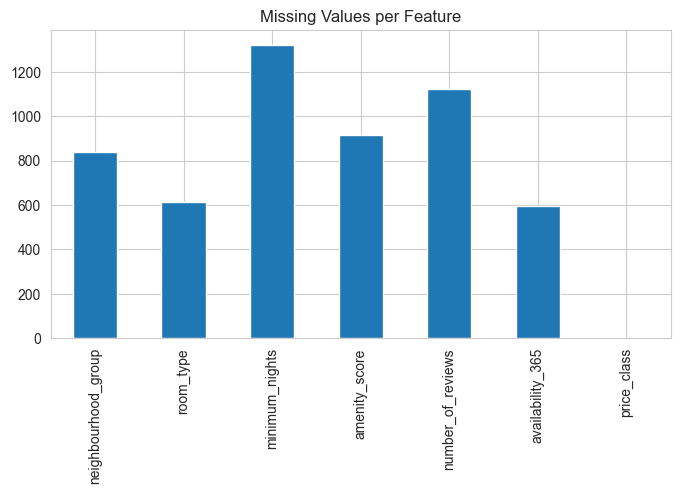

In [5]:
missing = train_df.isnull().sum()
print(missing)

missing.plot(kind='bar', figsize=(8,4))
plt.title("Missing Values per Feature")
plt.show()


In [6]:
cat_cols = ["neighbourhood_group", "room_type"]
num_cols = ["minimum_nights", "amenity_score", "number_of_reviews", "availability_365"]

# Fill categorical
for c in cat_cols:
    train_df[c] = train_df[c].fillna(train_df[c].mode()[0])

# Fill numerical
for c in num_cols:
    train_df[c] = train_df[c].fillna(train_df[c].median())

print(train_df.isnull().sum())


neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
price_class            0
dtype: int64


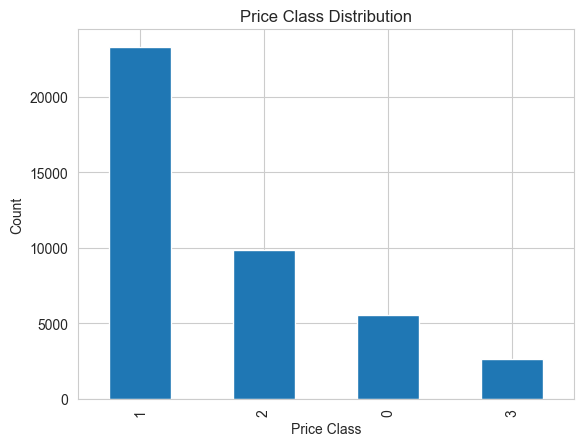

In [7]:
train_df["price_class"].value_counts().plot(kind="bar")
plt.title("Price Class Distribution")
plt.xlabel("Price Class")
plt.ylabel("Count")
plt.show()


In [8]:
print(train_df["price_class"].value_counts(normalize=True)*100)


price_class
1    56.319532
2    23.807681
0    13.463771
3     6.409016
Name: proportion, dtype: float64


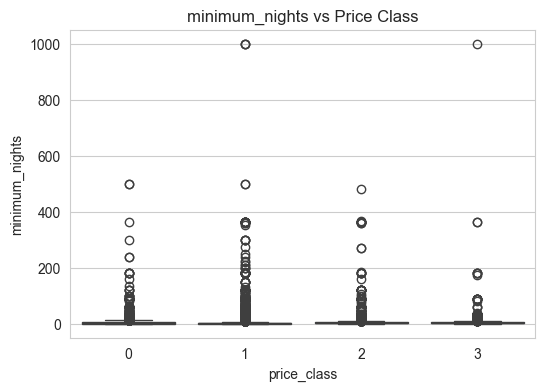

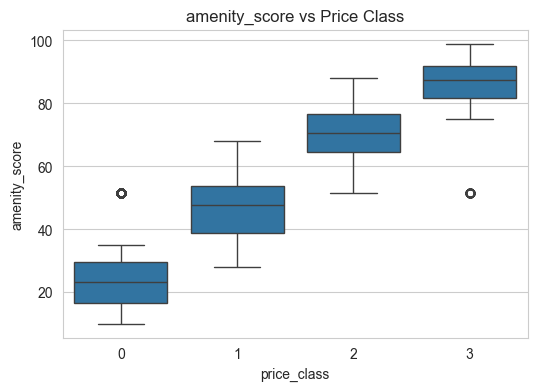

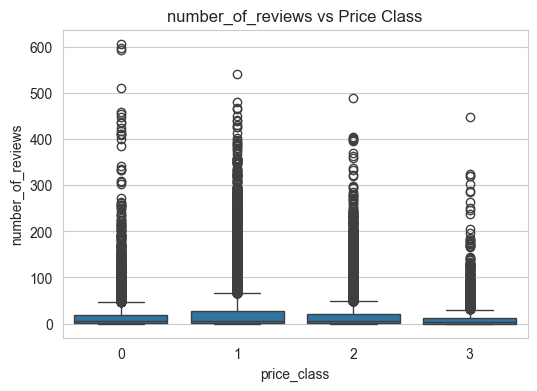

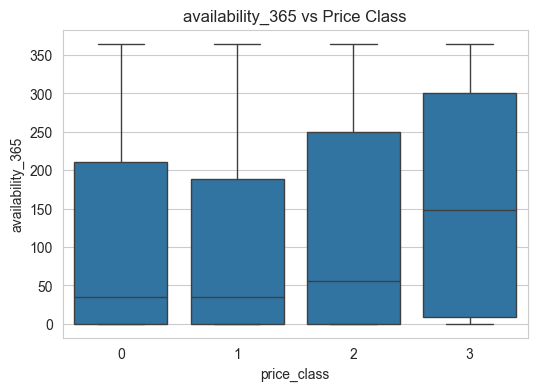

In [9]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="price_class", y=col, data=train_df)
    plt.title(f"{col} vs Price Class")
    plt.show()


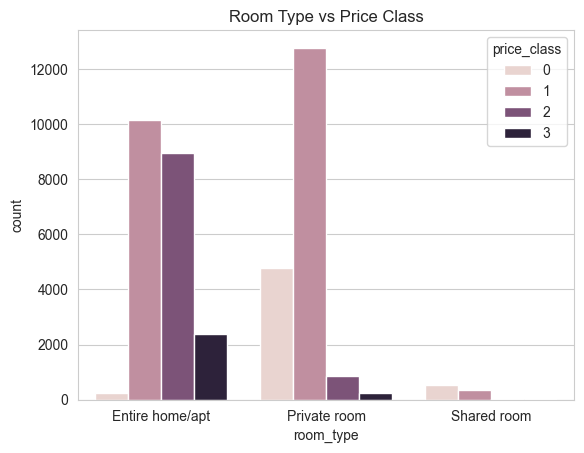

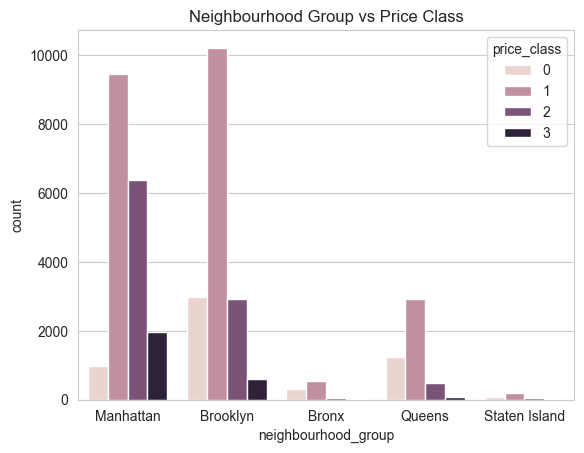

In [10]:
sns.countplot(data=train_df, x="room_type", hue="price_class")
plt.title("Room Type vs Price Class")
plt.show()

sns.countplot(data=train_df, x="neighbourhood_group", hue="price_class")
plt.title("Neighbourhood Group vs Price Class")
plt.show()


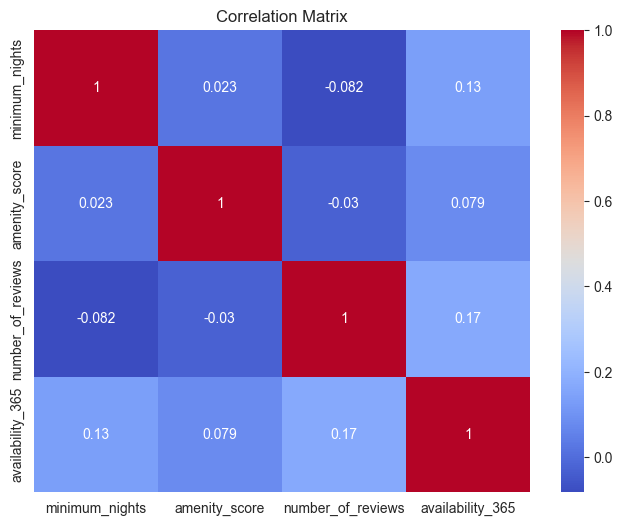

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:
train_df[num_cols].describe()


,minimum_nights,amenity_score,number_of_reviews,availability_365
count,41348.000000,41348.000000,41348.000000,41348.000000
mean,6.874891,51.974224,23.141676,110.934918
std,19.420221,19.242915,44.014080,130.576674
min,1.000000,10.000000,0.000000,0.000000
25%,1.000000,37.100000,1.000000,0.000000
50%,3.000000,51.400000,5.000000,44.000000
75%,5.000000,65.800000,23.000000,220.000000
max,1000.000000,99.000000,607.000000,365.000000
